## Data Summary Notebook

In this notebook we seek to extract data from the Platynereis Larva Dumerilii Connectome and categorize the data in a way that will allow us to easily plot meaningful statistics of the dataset

In [110]:
import pymaid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import logging
import collections
from itertools import chain, combinations
from pkg.platy import _get_folder, load_annotations

We start by first using pymaid to extract the dataset

In [111]:
rm = pymaid.CatmaidInstance(
    server="https://catmaid.jekelylab.ex.ac.uk/#",
    project_id=11,
    api_token=None,
    http_user=None,
    http_password=None,
)
logging.getLogger("pymaid").setLevel(logging.WARNING)
pymaid.clear_cache()

In [112]:
folder = _get_folder()
folder

PosixPath('/Users/kareefullah/Desktop/NeuroData/neurodata/platy-data/docs/outputs')

In [113]:
annotations = load_annotations()
annotations = annotations.fillna("N/A")
annotations

,skids,side,class,segment,type,group
0,1343291,rc,N/A,head,N/A,N/A
1,1332516,rc,s,head,49.0,N/A
2,1402724,rc,N/A,3,N/A,N/A
3,1462664,rc,N/A,2,N/A,N/A
4,84457,rc,N/A,head,N/A,N/A
...,...,...,...,...,...,...
9192,2256298,N/A,N/A,1,N/A,N/A
9193,2256326,N/A,N/A,1,N/A,N/A
9194,2256339,N/A,N/A,1,N/A,N/A
9195,1602239,N/A,N/A,1,N/A,N/A


With this table of annotations, we can make barplots to plot the number of neurons for certain categories

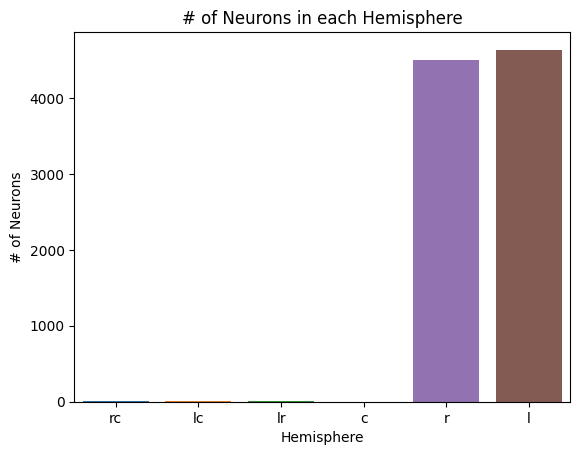

In [114]:
#print number of neurons in each hemisphere
hemis = {}
hemi_list = list(annotations["side"])
for i in range(len(hemi_list)):
    if hemi_list[i] == "N/A":
        continue
    
    if hemi_list[i] not in hemis:
        hemis[hemi_list[i]] = 1
    
    else:
        hemis[hemi_list[i]] += 1
sns.barplot(x=list(hemis.keys()), y=list(hemis.values())) 
plt.title("# of Neurons in each Hemisphere")
plt.xlabel("Hemisphere")
plt.ylabel("# of Neurons")
plt.savefig(folder / "neuron_count_hems")
    

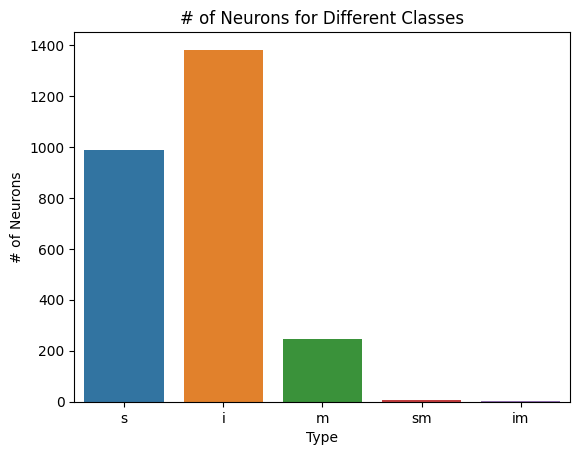

In [115]:
#print number of neurons for different types
classes = {}
class_list = list(annotations["class"])

for i in range(len(class_list)):
    if class_list[i] == "N/A":
        continue
    
    if class_list[i] not in classes:
        classes[class_list[i]] = 1
    
    else:
        classes[class_list[i]] += 1

sns.barplot(x=list(classes.keys()), y=list(classes.values())) 
plt.title("# of Neurons for Different Classes")
plt.xlabel("Type")
plt.ylabel("# of Neurons")
plt.savefig(folder / "neuron_count_classes")

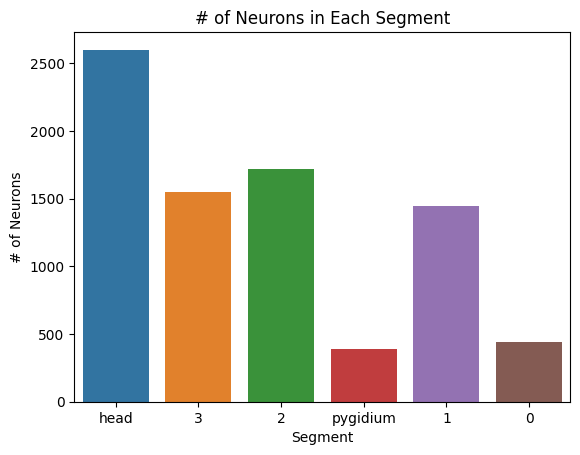

In [116]:
#print number of neurons in different segments
segments = {}
segment_list = list(annotations["segment"])

for i in range(len(segment_list)):
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segments:
        segments[segment_list[i]] = 1
    
    else:
        segments[segment_list[i]] += 1

sns.barplot(x=list(segments.keys()), y=list(segments.values())) 
plt.title("# of Neurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Neurons")
plt.savefig(folder / "neuron_count_segments")

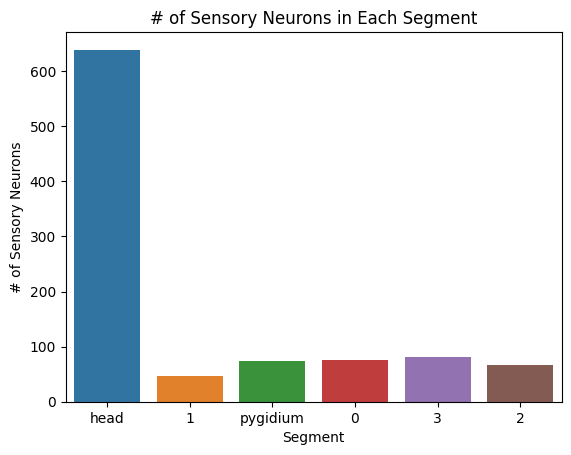

In [117]:
#print number of sensory neurons in each segment

indices = []
segment_sensory = {}
for i in range(len(class_list)):
    if(class_list[i] == "s"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_sensory:
        segment_sensory[segment_list[i]] = 1
    
    else:
        segment_sensory[segment_list[i]] += 1

sns.barplot(x=list(segment_sensory.keys()), y=list(segment_sensory.values())) 
plt.title("# of Sensory Neurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Sensory Neurons")
plt.savefig(folder / "neuron_count_sensory_in_segments")

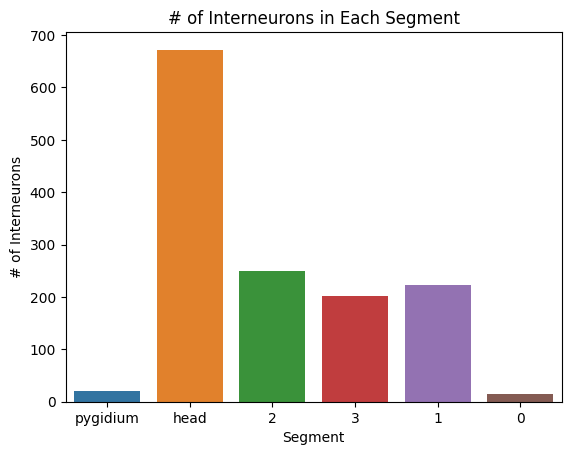

In [118]:
#print number of interneurons in each segment

indices = []
segment_inter = {}
for i in range(len(class_list)):
    if(class_list[i] == "i"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_inter:
        segment_inter[segment_list[i]] = 1
    
    else:
        segment_inter[segment_list[i]] += 1

sns.barplot(x=list(segment_inter.keys()), y=list(segment_inter.values())) 
plt.title("# of Interneurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Interneurons")
plt.savefig(folder / "neuron_count_inter_in_segments")

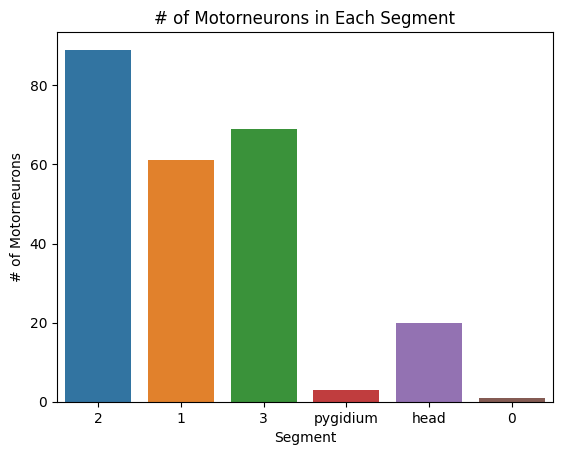

In [119]:
#print number of motorneurons in each segment

indices = []
segment_motor = {}
for i in range(len(class_list)):
    if(class_list[i] == "m"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_motor:
        segment_motor[segment_list[i]] = 1
    
    else:
        segment_motor[segment_list[i]] += 1
        
sns.barplot(x=list(segment_motor.keys()), y=list(segment_motor.values())) 
plt.title("# of Motorneurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Motorneurons")
plt.savefig(folder / "neuron_count_motor_in_segments")

In [120]:
#number of neurons in each celltype (specified by paper)
annotations.fillna("N/A")
celltype_count = {}
celltype_list = list(annotations["type"])
for i in range(len(celltype_list)):
    if celltype_list[i] == "N/A":
        continue
    
    if celltype_list[i] not in celltype_count:
        celltype_count[celltype_list[i]] = 1
    
    else:
        celltype_count[celltype_list[i]] += 1
celltype_count = {int(k):v for k,v in celltype_count.items()}
celltype_count = dict(sorted(celltype_count.items()))
df = pd.DataFrame.from_dict(celltype_count, orient="index", columns=["count"])
df = df.rename_axis('celltype', axis=1)
df.to_csv(folder / "neuron_count_neuronal_types.csv")
df

celltype,count
1,24
2,11
3,4
4,2
5,4
...,...
176,2
177,2
178,4
179,1


In [121]:
#number of neurons in each cellgroup (specified by paper)
cellgroup_count = {}
cellgroup_list = list(annotations["group"])
for i in range(len(cellgroup_list)):
    if cellgroup_list[i] == "N/A":
        continue
    if cellgroup_list[i] not in cellgroup_count:
        cellgroup_count[cellgroup_list[i]] = 1
    
    else:
        cellgroup_count[cellgroup_list[i]] += 1
cellgroup_count = {int(k):v for k,v in cellgroup_count.items()}
cellgroup_count = dict(sorted(cellgroup_count.items()))
df = pd.DataFrame.from_dict(cellgroup_count, orient="index", columns=["count"])
df = df.rename_axis('cellgroup', axis=1)
df.to_csv(folder / "neuron_count_groups.csv")
df

cellgroup,count
1,111
2,55
3,114
4,36
5,55
6,25
7,114
8,27
9,76
10,66


In [122]:
#number of cells in each non-neuronal celltype (TODO: make this a category in annotations?)
celltypes_non_neuronal = []
num_neurons = []
celltypes_non_neuronal_count = {}
for i, digit in enumerate(range(1, 91)):
   celltypes_non_neuronal.append("celltype_non_neuronal{}".format(str(digit)))
   num_neurons.append(len(pymaid.get_skids_by_annotation(celltypes_non_neuronal[i])))
   celltypes_non_neuronal_count[celltypes_non_neuronal[i]] = [num_neurons[i]]

df = pd.DataFrame.from_dict(celltypes_non_neuronal_count, orient="index", columns=["count"])
df.to_csv(folder / "neuron_count_non_neuronal_types")
print(df)

                         count
celltype_non_neuronal1       8
celltype_non_neuronal2       1
celltype_non_neuronal3      23
celltype_non_neuronal4       6
celltype_non_neuronal5       8
...                        ...
celltype_non_neuronal86      1
celltype_non_neuronal87      1
celltype_non_neuronal88      2
celltype_non_neuronal89      2
celltype_non_neuronal90   1079

[90 rows x 1 columns]
